### Image Classification Dogs - Cats

Want to create a model that will identify a cat or a dog from a picture

### Data Extraction

2 folders: one with 4000 cats pictures and the other with 4000 dogs pictures

In [2]:
import pandas as pd
import numpy as np
import cv2

In [3]:
#loop through the folder: took 1000 pictures in each folder to have a balanced dataset
#convert each picture to an array (with 3 lists: each RGB filter)
#reshape the array
#transform the lst into a dataframe

df= pd.DataFrame()
lst= []

for k in range(1,1000):
    im = cv2.imread(f"/Users/sarahpierre-louis/Desktop/dataset/training_set/dogs/dog.{k}.jpg")
    image_array = cv2.resize(im, (50, 50))
    image_arrayfinal = image_array.reshape(-1)
    lst.append(image_arrayfinal)
    
               
for k in range(1,1000):
    im = cv2.imread(f"/Users/sarahpierre-louis/Desktop/dataset/training_set/cats/cat.{k}.jpg")
    image_array = cv2.resize(im, (50, 50))
    image_arrayfinal = image_array.reshape(-1)
    lst.append(image_arrayfinal)
                           
df = pd.DataFrame(lst)


In [4]:
#create a column index
#need to add a label column to classify each picture : 0-cat, 1-dog
df['index']=df.index
df['labels']=np.where(df['index']<998, 0,1) #because the first 998 rows were cats and the following were dogs

#### Improvements that need to be made:

- transform the picture with grey scale --> less columns
- use PCA


### Random Forest

In [5]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [9]:
X_columns=[col for col in df.columns.values if (col !='labels')& (col !='index')]
X_df= df[X_columns]
y_df= df['labels']


In [10]:
#standardization using Minmaxscaler

X_columns = (X_columns-np.min(X_columns))/(np.max(X_columns)-np.min(X_columns))

In [11]:
#split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state =42)

In [12]:
#Define the model and its parameters

rf = RandomForestClassifier(n_estimators = 100, max_depth=2)

In [13]:
#Train the model

rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
# Predictions on training and validation
y_pred_train = rf.predict(X_train)

# Predictions for test
y_pred_test = rf.predict(X_test)

#### Model Evaluation

In [15]:
#confusion matrix - want to maximize the first and last column
from sklearn.metrics import confusion_matrix

print('confusion matrix train:',confusion_matrix(y_train, y_pred_train) )
print('confusion matrix test:', confusion_matrix(y_test, y_pred_test))

confusion matrix train: [[571 220]
 [290 517]]
confusion matrix test: [[136  71]
 [ 89 104]]


In [16]:
# training metrics
print("Training metrics:")
print(sklearn.metrics.classification_report(y_train, y_pred_train))
    
# test data metrics
print("Test data metrics:")
print(sklearn.metrics.classification_report(y_test,y_pred_test))


Training metrics:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       791
           1       0.70      0.64      0.67       807

    accuracy                           0.68      1598
   macro avg       0.68      0.68      0.68      1598
weighted avg       0.68      0.68      0.68      1598

Test data metrics:
              precision    recall  f1-score   support

           0       0.60      0.66      0.63       207
           1       0.59      0.54      0.57       193

    accuracy                           0.60       400
   macro avg       0.60      0.60      0.60       400
weighted avg       0.60      0.60      0.60       400



### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Model Evaluation

In [18]:
y_pred_test = model.predict(X_test)
confusion_matrix(y_test, y_pred_test)

array([[103, 104],
       [ 67, 126]])

In [19]:
from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

0.6056043653475508

In [20]:
y_pred_proba = model.predict_proba(X_train)[::,1] #the model is overfitting
auc = metrics.roc_auc_score(y_train, y_pred_proba)
auc

1.0

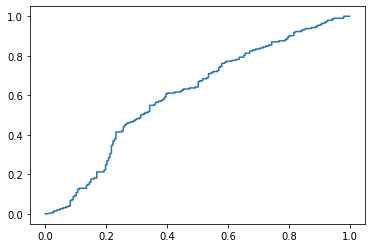

In [32]:
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr)

### CNN - Image classification

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D,Activation,MaxPooling2D,Dense,Flatten,Dropout
import numpy as np

Using TensorFlow backend.


In [26]:
# Initialize a convolutional neural network using the sequential model of keras.
# The sequential API allows us to create models layer-by-layer for most problems.
classifier = Sequential()


classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3)))

# Here, 32 is the number of filters needed. A filter is an array of numeric values. 
#(3,3) is the size of the filter, that means 3 rows and 3 columns.

#The input image is 64*64*3 size, that is, 64 height, 64 widths, and 3 refer to RGB values. 
#Each of the numbers in this array (64,64,3) is given values from 0 to 255, which describes the pixel intensity at that point.

#Activation Layer: 
classifier.add(Activation('relu'))

#Pooling: Pooling reduces the dimensionality of each feature map but retains the most important information.

classifier.add(MaxPooling2D(pool_size =(2,2)))
classifier.add(Conv2D(32,(3,3))) 
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))
classifier.add(Conv2D(32,(3,3))) 
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size =(2,2)))

In [27]:
"""
Dropout
To prevent overfitting, we use dropout layer in the model.  
This layer drops out a random set of activations in that layer by setting them to zero as data flows through it.

"""
classifier.add(Flatten())
classifier.add(Dense(64))
classifier.add(Activation('relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(1))
classifier.add(Activation('sigmoid'))



In [28]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)       

In [29]:
"""
Compiling the Model

Before we train the model with all the images, we have to compile the model. 
There is a specific method for that in keras, which is compile(). 

"""

classifier.compile(optimizer ='rmsprop',
                   loss ='binary_crossentropy',
                   metrics =['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [30]:
""""
Data Augmentation

Data augmentation is required before training the model to reduce overfitting. 
Data augmentation means increasing the number of images in the data set.

So, we will flip, zoom and do a lot of things with all the existing data set images, 
so that the machine will get a variety of types of images to study.
"""

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale =1./255,
                                   shear_range =0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip =True)
test_datagen = ImageDataGenerator(rescale = 1./255)



In [31]:
"""
Setting Train and Test directories

Before we train the model, we need to set the train and test directories. 
Keras has a method called flow_from_directory() method.

"""

training_set = train_datagen.flow_from_directory('/Users/sarahpierre-louis/Desktop/dataset/training_set',
                                                target_size=(64,64),
                                                batch_size= 32,
                                                class_mode='binary')
 
test_set = test_datagen.flow_from_directory('/Users/sarahpierre-louis/Desktop/dataset/test_set',
                                           target_size = (64,64),
                                           batch_size = 32,
                                           class_mode ='binary')

Found 12000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [33]:
"""
Training the classifier

Finally, it’s time to train the model. 

"""

from IPython.display import display
from PIL import Image
model = classifier.fit_generator(training_set,
                        steps_per_epoch =625,
                        epochs = 30,
                        validation_data =test_set,
                        validation_steps = 5000)

#went until accuracy: 86%

Epoch 1/30
625/625 [==============================] - 690s 1s/step - loss: 0.6435 - accuracy: 0.6661 - val_loss: 0.7765 - val_accuracy: 0.5000
Epoch 2/30
624/625 [============================>.] - ETA: 0s - loss: 0.6308 - accuracy: 0.6654

KeyboardInterrupt: 

In [34]:
"""
Need to save the model, so we can use it in the future without rerunning everything
Creating an HDF5 file

"""

classifier.save('catdog_model.h5')

In [35]:
"""
We can load the model

"""
from keras.models import load_model 
classifier = load_model('catdog_model.h5')

Populating the interactive namespace from numpy and matplotlib


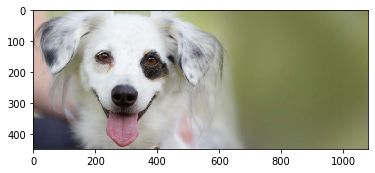

In [42]:
"""
Take a picture

"""

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/Users/sarahpierre-louis/Desktop/dog-landing-hero-lg.jpg')
imgplot = plt.imshow(img)
plt.show()

In [41]:
"""
We will test the model with the picture above

"""
import numpy as np
from keras.preprocessing import image
test_image =image.load_img('/Users/sarahpierre-louis/Desktop/dog-landing-hero-lg.jpg',target_size =(64,64))
test_image =image.img_to_array(test_image)
test_image =np.expand_dims(test_image, axis =0)
result = classifier.predict(test_image)
if result[0][0] >= 0.5:
    prediction = 'cat'
else:
    prediction = 'dog'
print(prediction)

dog
